In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
train_path = '/content/drive/MyDrive/Pet_Images/train'
test_path = '/content/drive/MyDrive/Pet_Images/test'
validation_path = '/content/drive/MyDrive/Pet_Images/validation'

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

train_dataset = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_dataset = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_dataset = train.flow_from_directory(train_path,
                                          target_size = (224,224),
                                          batch_size = 20,
                                          class_mode = 'binary')

test_dataset = train.flow_from_directory(test_path,
                                          target_size = (224,224),
                                          batch_size = 20,
                                          class_mode = 'binary')

train_dataset.class_indices

CLASSES=['Cat','Dog']

Found 102 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
base_model = VGG16(input_shape = (224, 224, 3),
                  include_top = False,
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.Dense(512, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

vgghist = model.fit(train_dataset,
                    validation_data = test_dataset,
                    epochs = 10,
                    steps_per_epoch = len(train_dataset), 
                    validation_steps = len(test_dataset))

Epoch 1/10
6/6 [==============================] - 28s 5s/step - loss: 1.3834 - accuracy: 0.5294 - val_loss: 0.5972 - val_accuracy: 0.6700
Epoch 2/10
6/6 [==============================] - 1s 220ms/step - loss: 0.5721 - accuracy: 0.7843 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 3/10
6/6 [==============================] - 1s 227ms/step - loss: 0.4368 - accuracy: 0.8431 - val_loss: 0.4579 - val_accuracy: 0.7700
Epoch 4/10
6/6 [==============================] - 1s 250ms/step - loss: 0.1787 - accuracy: 0.9510 - val_loss: 0.4820 - val_accuracy: 0.7700
Epoch 5/10
6/6 [==============================] - 1s 219ms/step - loss: 0.1759 - accuracy: 0.9216 - val_loss: 0.4284 - val_accuracy: 0.8400
Epoch 6/10
6/6 [==============================] - 1s 231ms/step - loss: 0.1562 - accuracy: 0.9608 - val_loss: 0.5503 - val_accuracy: 0.7100
Epoch 7/10
6/6 [==============================] - 1s 228ms/step - loss: 0.0911 - accuracy: 0.9902 - val_loss: 0.4166 - val_accuracy: 0.8300
Epoch 8/10
6/6 [======

In [ ]:
val_loss,val_acc = model.evaluate(train_dataset)
print(val_loss,val_acc)

6/6 [==============================] - 1s 91ms/step - loss: 0.0129 - accuracy: 1.0000
0.012947671115398407 1.0


In [ ]:
model.save('img_classifier.model')

INFO:tensorflow:Assets written to: img_classifier.model/assets


In [ ]:
new_model = tf.keras.models.load_model('img_classifier.model')

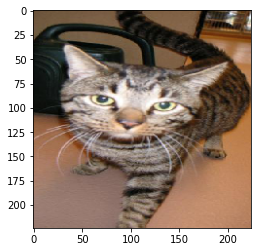


		It is a Cat




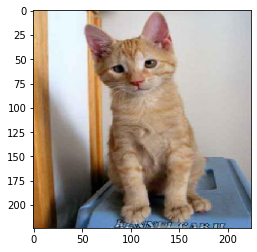


		It is a Cat




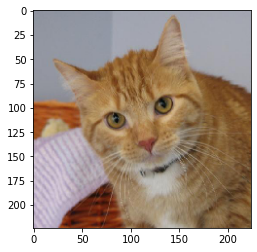


		It is a Cat




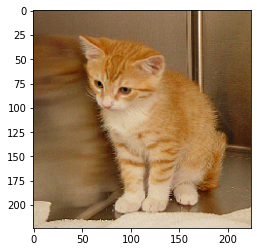


		It is a Cat




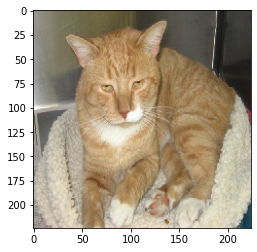


		It is a Cat




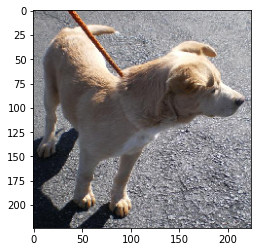


		It is a Dog




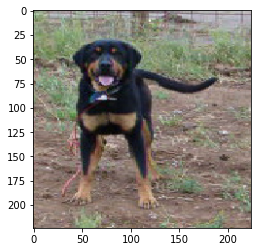


		It is a Dog




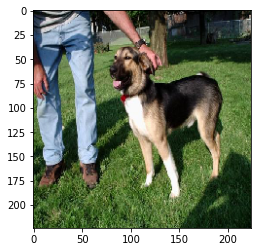


		It is a Dog




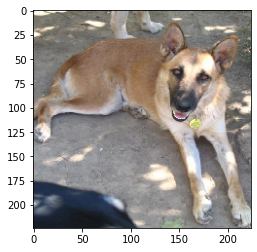


		It is a Dog




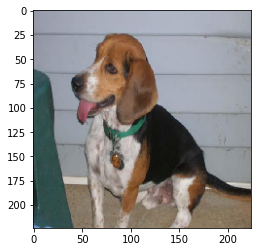


		It is a Dog




In [ ]:
for i in os.listdir(validation_path):
  image = load_img(validation_path + '//' + i,target_size=(224,224))

  plt.imshow(image)
  plt.show()
  
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)

  out = model.predict(image)
  class_name = (int)(out)

  print("\n\t\tIt is a " + CLASSES[class_name] + "\n\n")  
  